# TEA Campus Performance Data Analysis

## Step 1: Data Exploration

### [Data Source](https://rptsvr1.tea.texas.gov/perfreport/account/2019/download.html)

Here we will download Campus Level data Accountability Summary.  A [reference](https://rptsvr1.tea.texas.gov/perfreport/account/2019/download/camprate.html) to explain available columns.  We want columns that will either identify a school, measure school performance, or serve as features that might predict school performance.

In [1]:
import pandas as pd

df = pd.read_csv('./data/CAMPRATE.csv', 
                 usecols=['CAMPUS','CAMPNAME','DISTRICT', 
                                                 'DISTNAME', 'CDALLS', 
                                                 'C_RATING', 'CD1S', 'CD1G', 
                                                 'CD2A', 'CD2AG', 'CD2AS', 
                                                 'CD3', 'CD3G', 'CD3S', 
                                                 'GRDTYPE', 'CFLCHART', 'CFLNEWCAMP', 
                                                 'CPEMALLP', 'CPETALLC', 'CPETECHP', 
                                                 'CPETECOP', 'CPETLEPP', 'CPETSPEP', 'CPETSTEP'])
df.rename(columns={'CDALLS':'OVERALL_SCALED_SCORE', 
                   'C_RATING':'OVERALL_RATING', 
                   'CD1S':'STUDENT_ACHIEVEMENT_SCALED', 
                   'CD1G':'STUDENT_ACHIEVEMENT_RATING', 
                   'CD2A':'SCHOOL_PROGRESS_ACAD_GROWTH_RAW', 
                   'CD2AG':'SCHOOL_PROGRESS_ACAD_GROWTH_RATING', 
                   'CD2AS':'SCHOOL_PROGRESS_ACAD_GROWTH_SCALED', 
                   'CD3':'CLOSING_GAPS_RAW', 
                   'CD3G':'CLOSING_GAPS_RATING', 
                   'CD3S':'CLOSING_GAPS_SCALED', 
                   'GRDTYPE':'SCHOOL_TYPE',
                   'CFLCHART':'FLAG_CHARTER', 
                   'CFLNEWCAMP':'FLAG_NEW', 
                   'CPEMALLP':'STUDENT_MOBILITY_PCT',
                   'CPETALLC':'STUDENT_COUNT',
                   'CPETECHP':'ECHS_PCT', 
                   'CPETECOP':'ECON_DISADV_PCT', 
                   'CPETLEPP':'LEP_PCT', 
                   'CPETSPEP':'SPED_PCT', 
                   'CPETSTEP':'TSTEM_PCT'}, inplace=True)
df.head()

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,STUDENT_COUNT,ECHS_PCT,ECON_DISADV_PCT,LEP_PCT,SPED_PCT,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE
0,1902001,CAYUGA H S,A,93,80,A,90,100,A,100,...,179,0.0,39.1,0.0,20.1,0.0,A,CAYUGA ISD,1902,S
1,1902041,CAYUGA MIDDLE,B,85,67,C,72,66,C,79,...,119,0.0,35.3,0.8,10.9,0.0,B,CAYUGA ISD,1902,M
2,1902103,CAYUGA EL,A,90,76,B,82,97,A,94,...,266,0.0,48.1,0.0,13.2,0.0,A,CAYUGA ISD,1902,E
3,1903001,ELKHART H S,A,91,75,B,85,78,B,83,...,376,0.0,49.7,0.0,11.4,0.0,B,ELKHART ISD,1903,S
4,1903002,ELKHART DAEP,Not Rated,.,.,Not Rated,.,.,Not Rated,.,...,2,0.0,100.0,0.0,0.0,0.0,Not Rated,ELKHART ISD,1903,S


#### Empty cells are filled with a . which is a string character.  We can't convert values to floats without replacing the . symbols with NaNs.

In [2]:
import numpy as np
df.replace({'.':np.nan, 'Y':1, 'N':0}, inplace=True)
df.head()

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,STUDENT_COUNT,ECHS_PCT,ECON_DISADV_PCT,LEP_PCT,SPED_PCT,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE
0,1902001,CAYUGA H S,A,93,80,A,90,100,A,100,...,179,0.0,39.1,0.0,20.1,0.0,A,CAYUGA ISD,1902,S
1,1902041,CAYUGA MIDDLE,B,85,67,C,72,66,C,79,...,119,0.0,35.3,0.8,10.9,0.0,B,CAYUGA ISD,1902,M
2,1902103,CAYUGA EL,A,90,76,B,82,97,A,94,...,266,0.0,48.1,0.0,13.2,0.0,A,CAYUGA ISD,1902,E
3,1903001,ELKHART H S,A,91,75,B,85,78,B,83,...,376,0.0,49.7,0.0,11.4,0.0,B,ELKHART ISD,1903,S
4,1903002,ELKHART DAEP,Not Rated,NaN,NaN,Not Rated,NaN,NaN,Not Rated,NaN,...,2,0.0,100.0,0.0,0.0,0.0,Not Rated,ELKHART ISD,1903,S


#### Now we need to convert the numeric columns from strings to integers or floats.

In [3]:
df = df.astype({'OVERALL_SCALED_SCORE': float,
           'STUDENT_ACHIEVEMENT_SCALED': float, 
           'SCHOOL_PROGRESS_ACAD_GROWTH_RAW': float, 
           'SCHOOL_PROGRESS_ACAD_GROWTH_SCALED': float,
           'CLOSING_GAPS_RAW': float,
           'CLOSING_GAPS_SCALED': float,
           'STUDENT_MOBILITY_PCT': float,
           'STUDENT_COUNT': 'int64',
           'ECHS_PCT': float,
           'ECON_DISADV_PCT': float,
           'LEP_PCT': float,
           'SPED_PCT': float,
           'TSTEM_PCT': float})

### Total number of schools in the dataset

In [4]:
df.shape[0]

8838

### Look at the distribution of performance data.

Text(0.5, 0, 'Overall Scaled Score')

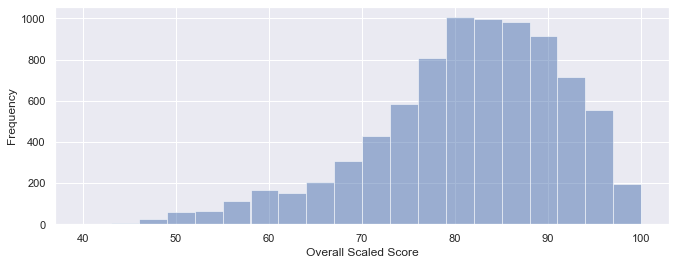

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11, 4)})

ax1 = df['OVERALL_SCALED_SCORE'].plot.hist(bins=20, alpha=0.5)
ax1.set_xlabel('Overall Scaled Score')

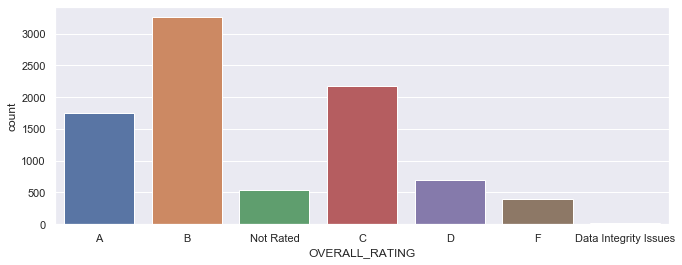

In [6]:
ax2 = sns.countplot(x="OVERALL_RATING", data=df)

#### Let's look at correlations between all of our variables

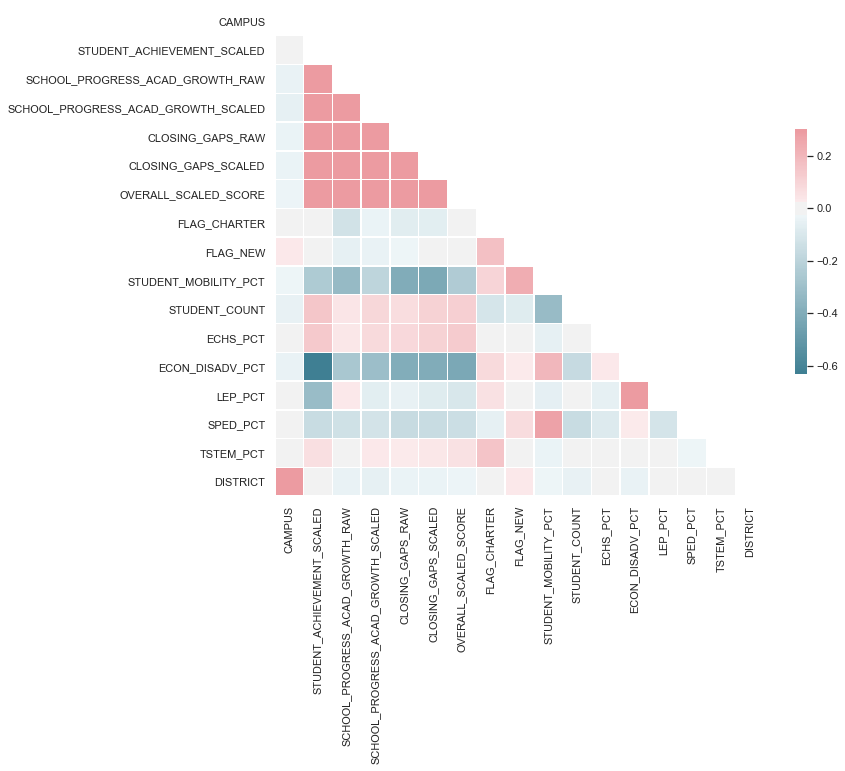

In [7]:
sns.set(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


#### Some insights we can get from the above plot - looking for correlations between school demographic or type data and performance data.  More red means a positive correlation and more green means a negative correlation.  

Start with overall scaled score - we see slight positive correlations with TSTEM percentage, early college high school percentage, student count; negative correlations with percentage economically disadvantaged, SPED, LEP, and student mobility; and no correlation with charter status or new school status.  

# Looking for Outliers

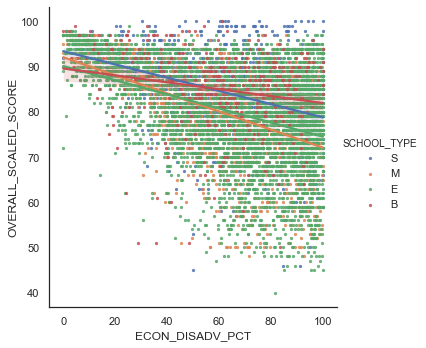

In [8]:
sns.lmplot(x="ECON_DISADV_PCT", y="OVERALL_SCALED_SCORE", data=df, fit_reg=True, 
           hue='SCHOOL_TYPE', scatter_kws={"s": 5})

#### It looks like for schools with a higher percentage of economically disadvantaged students there is a wide range of overall scaled scores.  How much of this is accounted for by school type or other characteristics?  Can we find schools that are doing better than others with the same characteristics?  We can use different types of models that consider all characteristics and find schools that do significantly better than their predicted score.

## Step 2: Prepare Data

In [9]:
#Drop schools that do not have an overall scaled score
df.dropna(subset=['OVERALL_SCALED_SCORE'], inplace=True)

In [10]:
#Encode school type data using one hot encoding
df['SCHOOL_TYPE_E'] = pd.get_dummies(df['SCHOOL_TYPE'])['E']
df['SCHOOL_TYPE_M'] = pd.get_dummies(df['SCHOOL_TYPE'])['M']
df['SCHOOL_TYPE_S'] = pd.get_dummies(df['SCHOOL_TYPE'])['S']

In [11]:
#Randomize the data
df = df.reindex(np.random.permutation(df.index))

In [12]:
#Set features and target
features = ['SCHOOL_TYPE_E', 'SCHOOL_TYPE_M','SCHOOL_TYPE_S', 'FLAG_CHARTER', 'FLAG_NEW', 
            'STUDENT_COUNT', 'ECHS_PCT', 'ECON_DISADV_PCT', 'LEP_PCT', 'SPED_PCT', 'TSTEM_PCT']
target = ['OVERALL_SCALED_SCORE']

In [13]:
#Make arrays for training and testing
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2)

X_train = df_train[features].values
X_test = df_test[features].values
y_train = np.ravel(df_train[target].values)
y_test = np.ravel(df_test[target].values)

print("{} schools in training set".format(X_train.shape[0]))
print("{} schools in test set".format(X_test.shape[0]))

6637 schools in training set
1660 schools in test set


## Step 3: Fit the Model

In [14]:
from sklearn.ensemble import RandomForestRegressor

RF_model = RandomForestRegressor(verbose=True, min_samples_leaf=10)
RF_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.5s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=True, warm_start=False)

## Step 4: Look at the Results

In [15]:
#Use the trained model to predict overall scaled score on schools in test set
y_pred = RF_model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [16]:
#Get performance metrics
from sklearn.metrics import mean_squared_error

print("Root mean squared error on test set: {}".format(np.sqrt(mean_squared_error(y_pred, y_test))))

Root mean squared error on test set: 8.789477726237697


Text(0.5, 0, 'Residual')

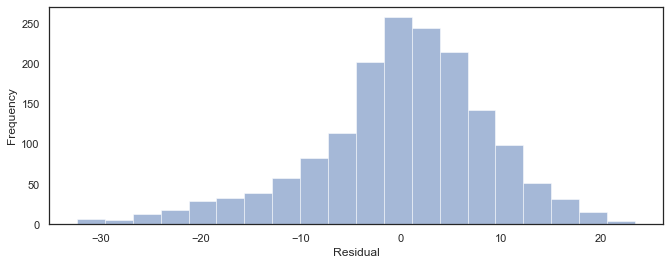

In [17]:
#Look at the distribution of residuals
res = y_test - y_pred
ax3 = pd.DataFrame(res).plot.hist(bins=20, alpha=0.5, legend=False)
ax3.set_xlabel('Residual')

Text(0, 0.5, 'Actual Score')

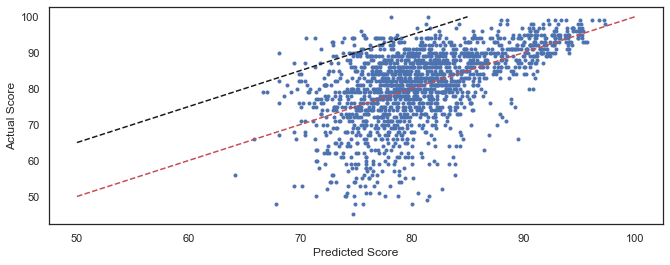

In [18]:
#Plot actual score vs predicted score.  
plt.plot(y_pred, y_test, '.')
plt.plot([50,100],[50,100],'r--')
plt.plot([50,85],[65,100], 'k--')
plt.xlabel('Predicted Score')
plt.ylabel('Actual Score')

Red dashed line is the one to one line - points above scored higher than their prediction.
Black dashed line is the plus 15 line - points above exceeded their prediction by 15 points or better.

Text(0, 0.5, 'Residual')

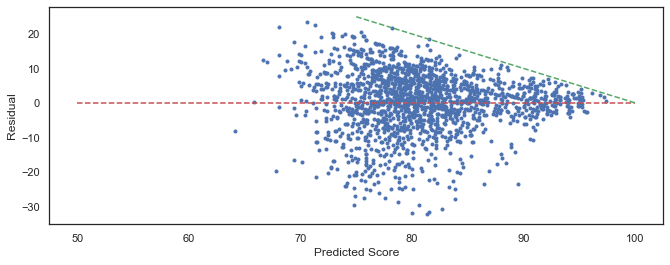

In [19]:
#Plot residuals as a function of predicted score
plt.plot(y_pred, res, '.')
plt.plot([50,100],[0,0],'r--')
plt.plot([75,100],[25,0], 'g--')
plt.xlabel('Predicted Score')
plt.ylabel('Residual')

Red dashed line is residual of zero.  Points above represent schools that exceeded their prediction.  Green dashed line is an actual score of 100.

Text(0, 0.5, 'Residual')

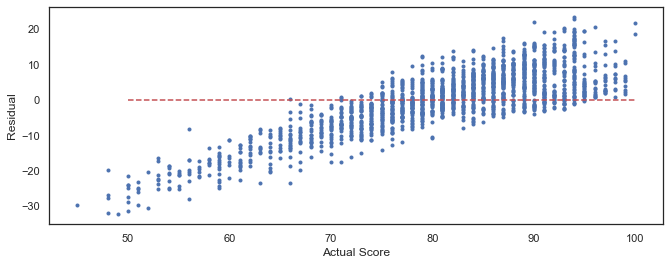

In [20]:
#Plot residuals as a function of actual score
plt.plot(y_test, res, '.')
plt.plot([50,100],[0,0],'r--')
#plt.plot([75,100],[25,0], 'g--')
plt.xlabel('Actual Score')
plt.ylabel('Residual')

In [21]:
#Show how much each feature contributes to the model prediction
feature_importances = pd.DataFrame(RF_model.feature_importances_,
                                   index = df[features].columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances)

                 importance
ECON_DISADV_PCT    0.497480
LEP_PCT            0.139629
SPED_PCT           0.136861
STUDENT_COUNT      0.113231
SCHOOL_TYPE_S      0.062634
SCHOOL_TYPE_E      0.016244
SCHOOL_TYPE_M      0.015586
ECHS_PCT           0.008789
FLAG_CHARTER       0.007752
TSTEM_PCT          0.001148
FLAG_NEW           0.000646


## Step 5: Get an 'overperformance' score

In [22]:
#Retrain a model using the data from all schools.
X_all = df[features].values
y_all = np.ravel(df[target].values)

RF_model_all = RandomForestRegressor(verbose=True, min_samples_leaf=10)
RF_model_all.fit(X_all, y_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.8s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=True, warm_start=False)

In [23]:
#Get a prediction score for each school based on the model.
df['PREDICTED_OVERALL_SCALED_SCORE'] = RF_model_all.predict(X_all)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [24]:
#Give each school an 'overperformance score'.
df['OVERPERFORMANCE'] = df['OVERALL_SCALED_SCORE']-df['PREDICTED_OVERALL_SCALED_SCORE']

#Sort dataframe by overperformance column and look at the top 20 schools.
df.sort_values(by=['OVERPERFORMANCE'], ascending=False).head(20)

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE,SCHOOL_TYPE_E,SCHOOL_TYPE_M,SCHOOL_TYPE_S,PREDICTED_OVERALL_SCALED_SCORE,OVERPERFORMANCE
3285,76904101,ROTAN EL,B,86.0,70.0,C,72.0,100.0,A,100.0,...,0.0,A,ROTAN ISD,76904,E,1,0,0,72.050038,20.949962
6929,194902101,AVERY EL,B,86.0,83.0,A,91.0,100.0,A,100.0,...,0.0,A,AVERY ISD,194902,E,1,0,0,73.766771,20.233229
5811,133903107,EARLY CHILDHOOD CENTER,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,A,KERRVILLE ISD,133903,E,1,0,0,73.842542,20.157458
2845,68901106,CARVER EARLY EE-KG,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,A,ECTOR COUNTY ISD,68901,E,1,0,0,73.952673,19.047327
5977,152802101,RISE ACADEMY,A,92.0,72.0,C,75.0,100.0,A,100.0,...,0.0,A,RISE ACADEMY,152802,E,1,0,0,76.039871,18.960129
3485,84902114,ROSENBERG EL LABORATORY FOR LEARNI,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,A,GALVESTON ISD,84902,E,1,0,0,75.119180,18.880820
2852,68901115,LAMAR EARLY EE-KG,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,A,ECTOR COUNTY ISD,68901,E,1,0,0,78.201010,18.798990
2885,70903107,G W CARVER EARLY CHILDHOOD CENTER,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,A,ENNIS ISD,70903,E,1,0,0,75.209553,18.790447
3199,72801113,PREMIER H S OF AUSTIN,A,94.0,67.0,B,82.0,67.0,A,95.0,...,0.0,A,PREMIER HIGH SCHOOLS,72801,S,0,0,1,81.344608,18.655392
4285,101912106,ATHERTON EL,C,79.0,75.0,B,80.0,100.0,A,100.0,...,0.0,A,HOUSTON ISD,101912,E,1,0,0,73.389426,18.610574


In [25]:
#Search for a district.
df[df['DISTNAME'].str.contains("SPRING BRANCH")]

,CAMPUS,CAMPNAME,STUDENT_ACHIEVEMENT_RATING,STUDENT_ACHIEVEMENT_SCALED,SCHOOL_PROGRESS_ACAD_GROWTH_RAW,SCHOOL_PROGRESS_ACAD_GROWTH_RATING,SCHOOL_PROGRESS_ACAD_GROWTH_SCALED,CLOSING_GAPS_RAW,CLOSING_GAPS_RATING,CLOSING_GAPS_SCALED,...,TSTEM_PCT,OVERALL_RATING,DISTNAME,DISTRICT,SCHOOL_TYPE,SCHOOL_TYPE_E,SCHOOL_TYPE_M,SCHOOL_TYPE_S,PREDICTED_OVERALL_SCALED_SCORE,OVERPERFORMANCE
4791,101920045,SPRING FOREST MIDDLE,B,84.0,68.0,C,74.0,51.0,C,75.0,...,0.0,B,SPRING BRANCH ISD,101920,M,0,1,0,80.736596,0.263404
4800,101920106,HOUSMAN EL,F,57.0,67.0,D,67.0,31.0,D,63.0,...,0.0,D,SPRING BRANCH ISD,101920,E,1,0,0,77.192749,-11.192749
4824,101920131,THE BEAR BLVD SCHOOL,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,NaN,Not Rated: Paired Campus,NaN,...,0.0,A,SPRING BRANCH ISD,101920,E,1,0,0,81.054080,12.945920
4785,101920016,ACADEMY OF CHOICE,C,79.0,60.0,C,78.0,10.0,C,70.0,...,0.0,C,SPRING BRANCH ISD,101920,B,0,0,0,84.642913,-5.642913
4790,101920044,SPRING WOODS MIDDLE,F,57.0,62.0,D,60.0,5.0,F,45.0,...,0.0,D,SPRING BRANCH ISD,101920,M,0,1,0,73.825245,-13.825245
4819,101920125,TREASURE FOREST EL,F,48.0,57.0,F,56.0,17.0,F,52.0,...,0.0,F,SPRING BRANCH ISD,101920,E,1,0,0,74.938994,-19.938994
4788,101920042,MEMORIAL MIDDLE,A,94.0,73.0,B,81.0,86.0,B,88.0,...,0.0,A,SPRING BRANCH ISD,101920,M,0,1,0,95.474396,-3.474396
4786,101920018,SPRING BRANCH ACADEMIC INSTITUTE,A,98.0,90.0,A,95.0,100.0,A,100.0,...,0.0,A,SPRING BRANCH ISD,101920,B,0,0,0,94.992255,4.007745
4796,101920102,BUNKER HILL EL,A,92.0,78.0,B,85.0,100.0,A,100.0,...,0.0,A,SPRING BRANCH ISD,101920,E,1,0,0,94.402984,-0.402984
4807,101920113,SHADOW OAKS EL,F,58.0,70.0,C,72.0,48.0,C,70.0,...,0.0,C,SPRING BRANCH ISD,101920,E,1,0,0,77.807964,-6.807964


## Step 6: Repeat the model to get a sample of predictions

In [26]:
#Get a sample of scores

N = 1000
y_pred = []
X_all = df[features].values
y_all = np.ravel(df[target].values)
for i in range(N):
    #Retrain a model using the data from all schools.
    RF_model_all = RandomForestRegressor(min_samples_leaf=10)
    RF_model_all.fit(X_all, y_all)
    #Get a prediction score for each school based on the model.
    y_pred.append(RF_model_all.predict(X_all))

#Calculate the mean and 95% confidence intervals for each school.
y_mean = np.mean(y_pred, axis=0)
y_low = y_mean - 1.96*np.std(y_pred, axis=0)
y_high = y_mean + 1.96*np.std(y_pred, axis=0)

In [27]:
# Add mean predictions and confidence intervals to the dataframe
df['PREDICTED_OVERALL_SCALED_SCORE'] = y_mean
df['PREDICTED_OVERALL_SCALED_SCORE_HI'] = y_high
df['PREDICTED_OVERALL_SCALED_SCORE_LOW'] = y_low

In [28]:
#Add an 'overperformance' score with confidence intervals to the dataframe
df['OVERPERFORMANCE'] = df['OVERALL_SCALED_SCORE'] - df['PREDICTED_OVERALL_SCALED_SCORE']
df['OVERPERFORMANCE_LOW'] = df['OVERALL_SCALED_SCORE'] - df['PREDICTED_OVERALL_SCALED_SCORE_HI']
df['OVERPERFORMANCE_HI'] = df['OVERALL_SCALED_SCORE'] - df['PREDICTED_OVERALL_SCALED_SCORE_LOW']

## Simple query 

In [29]:
#Create a function that allows you to enter search criteria and shows the results.
def look_at(district_search):
    cols = ['CAMPNAME', 'OVERALL_RATING', 'PREDICTED_OVERALL_SCALED_SCORE', 'OVERALL_SCALED_SCORE', 'OVERPERFORMANCE_LOW', 'OVERPERFORMANCE_HI']
    return df[df['DISTNAME'].str.contains(district_search)][cols]

In [30]:
look_at('SPRING BRANCH')

,CAMPNAME,OVERALL_RATING,PREDICTED_OVERALL_SCALED_SCORE,OVERALL_SCALED_SCORE,OVERPERFORMANCE_LOW,OVERPERFORMANCE_HI
4791,SPRING FOREST MIDDLE,B,80.719836,81.0,-0.461270,1.021598
4800,HOUSMAN EL,D,77.402537,66.0,-12.228995,-10.576080
4824,THE BEAR BLVD SCHOOL,A,81.559692,94.0,11.397592,13.483023
4785,ACADEMY OF CHOICE,C,83.472789,79.0,-5.569031,-3.376546
4790,SPRING WOODS MIDDLE,D,74.006750,60.0,-14.970719,-13.042781
4819,TREASURE FOREST EL,F,75.496020,55.0,-21.609939,-19.382102
4788,MEMORIAL MIDDLE,A,95.510265,92.0,-3.724495,-3.296034
4786,SPRING BRANCH ACADEMIC INSTITUTE,A,95.374578,99.0,3.127062,4.123782
4796,BUNKER HILL EL,A,94.467748,94.0,-0.634485,-0.301011
4807,SHADOW OAKS EL,C,76.815855,71.0,-6.664943,-4.966766
